In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from matplotlib_venn import venn2, venn3, venn3_circles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [3]:
functions_archaea = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')

In [4]:
functions_bac = pd.read_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')

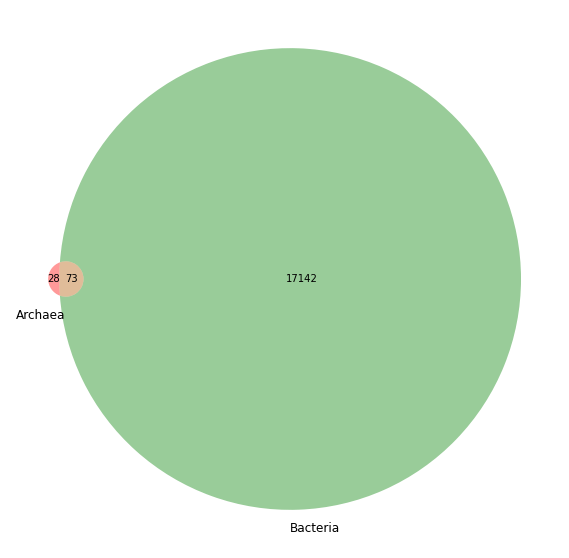

In [5]:
plt.figure(figsize=(10,10))
arch = set(functions_archaea.id.unique())
bac = set(functions_bac.id.unique())

venn2([arch, bac], ('Archaea', 'Bacteria'))
plt.show()

In [6]:
common_functions = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/common_functions.csv',
                              header=None, 
                                names = ['id', 'protein', 'cluster', 'description','count_x', 'count_y'])

common_functions

id                      protein  cluster  \
0     K14171  GUT_GENOME132203.fasta_1015  108584    
1     K14171  GUT_GENOME140888.fasta_1306  108584    
2     K15044  GUT_GENOME048380.fasta_988   38898     
3     K15044  GUT_GENOME048397.fasta_692   38898     
4     K16158  GUT_GENOME068622.fasta_447   55510     
...      ...                         ...     ...     
1142  K22340  GUT_GENOME029030.fasta_787   128310    
1143  K06293  GUT_GENOME087444.fasta_530   71544     
1144  K06293  GUT_GENOME091533.fasta_908   71544     
1145  K22541  GUT_GENOME237437.fasta_1133  190166    
1146  K22541  GUT_GENOME236870.fasta_1268  190166    

                                             description  count_x  count_y  
0     alkyl hydroperoxide reductase 1                     2        2        
1     alkyl hydroperoxide reductase 1                     2        2        
2     Arf-GAP domain and FG repeats-containing protein 1  2        2        
3     Arf-GAP domain and FG repeats-containing protein 1  2        2        
4     methane monooxygenase component A beta chain        7        7        
...                                            ...       ..       ..        
1142  formate dehydrogenase (NAD+, ferredoxin) subunit C  2        2        
1143  spore germination protein BC                        2        2        
1144  spore germination protein BC                        2        2        
1145  3-hydroxyacyl-thioester dehydratase, fungi type     2        2        
1146  3-hydroxyacyl-thioester dehydratase, fungi type     2        2        

[1147 rows x 6 columns]

In [10]:
common_keggs = common_functions[['id']].drop_duplicates()
common_keggs.head()

id
0   K14171
2   K15044
4   K16158
11  K20262
13  K10984

extract archaeal proteins with 73 common kegg ids

In [13]:
functions_archaea_common_keggs = functions_archaea.merge(common_keggs)
functions_archaea_common_keggs

protein  cluster      id  \
0     GUT_GENOME139173.fasta_357   135737   K12706   
1     GUT_GENOME105868.fasta_196   135737   K12706   
2     GUT_GENOME104819.fasta_673   135737   K12706   
3     GUT_GENOME048336.fasta_939   135737   K12706   
4     GUT_GENOME280278.fasta_484   135737   K12706   
...                          ...      ...      ...   
1142  GUT_GENOME013709.fasta_376   10982    K10203   
1143  GUT_GENOME158288.fasta_792   128310   K22340   
1144  GUT_GENOME029030.fasta_787   128310   K22340   
1145  GUT_GENOME247693.fasta_1138  14361    K10171   
1146  GUT_GENOME015317.fasta_1754  14361    K10171   

                                              description  count_x  count_y  
0     novobiocin biosynthesis protein NovC                 21       16       
1     novobiocin biosynthesis protein NovC                 21       16       
2     novobiocin biosynthesis protein NovC                 21       16       
3     novobiocin biosynthesis protein NovC                 21       16       
4     novobiocin biosynthesis protein NovC                 21       16       
...                                    ...                 ..       ..       
1142  elongation of very long chain fatty acids protein 6  2        2        
1143  formate dehydrogenase (NAD+, ferredoxin) subunit C   2        2        
1144  formate dehydrogenase (NAD+, ferredoxin) subunit C   2        2        
1145  toll-like receptor 10                                2        2        
1146  toll-like receptor 10                                2        2        

[1147 rows x 6 columns]

In [14]:
functions_archaea_common_keggs['cluster'] = 'a_' + functions_archaea_common_keggs['cluster'].astype(str)

In [20]:
functions_archaea_common_keggs.cluster.nunique() #131 such clusters shaaring 73 common kegg ids

131

extract bacterial proteins with 73 common kegg ids

In [16]:
functions_bac_common_keggs = functions_bac.merge(common_keggs)
functions_bac_common_keggs

protein    cluster      id  \
0       GUT_GENOME001575_1_140  b_4683921  K19506   
1       GUT_GENOME001575_1_140  b_4683921  K19506   
2       3300007353_12_1571      b_4683921  K19506   
3       3300007353_12_1571      b_4683921  K19506   
4       GUT_GENOME284747_39_17  b_4683921  K19506   
...                        ...        ...     ...   
107386  GUT_GENOME000831_5_69   b_6145928  K15809   
107387  GUT_GENOME028831_6_74   b_6145928  K15809   
107388  GUT_GENOME028831_6_74   b_6145928  K15809   
107389  GUT_GENOME058845_1_135  b_6145928  K15809   
107390  GUT_GENOME054189_5_74   b_6145928  K15809   

                                                   description  
0       fructoselysine/glucoselysine PTS system EIIA component  
1       fructoselysine/glucoselysine PTS system EIIA component  
2       fructoselysine/glucoselysine PTS system EIIA component  
3       fructoselysine/glucoselysine PTS system EIIA component  
4       fructoselysine/glucoselysine PTS system EIIA component  
...                                                        ...  
107386  cis-muuroladiene synthase                               
107387  cis-muuroladiene synthase                               
107388  cis-muuroladiene synthase                               
107389  cis-muuroladiene synthase                               
107390  cis-muuroladiene synthase                               

[107391 rows x 4 columns]

In [18]:
functions_bac_common_keggs.cluster.nunique() #2502 such clusters shaaring 73 common kegg ids

2502

save to run smash on these protein clusters:

In [23]:
functions_archaea_common_keggs[['protein', 'cluster']]\
.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_proteins_common_keggs.tsv',
        index=False, header=None, sep='\t')

In [32]:
functions_bac_common_keggs[['protein', 'cluster']].drop_duplicates()\
.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_proteins_common_keggs.tsv',
        index=False, header=None, sep='\t')